In [ ]:
!git clone https://github.com/Kidrod/Intrusion-Detection-CVAE.git

Cloning into 'Intrusion-Detection-CVAE'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 56 (delta 17), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (56/56), done.


In [ ]:
import pandas as pd
from tensorflow.keras.utils import get_file

try:
    path = get_file('NF-CSE-CIC-IDS2018.csv', origin=\
    'https://github.com/Kidrod/databases/releases/download/v1.0/NF-CSE-CIC-IDS2018.csv',archive_format=None)
except:
    print('Error downloading')
    raise
print(path)

df = pd.read_csv(path)
print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) 
df

620014585/620014585 [==============================] - 11s 0us/step
/root/.keras/datasets/NF-CSE-CIC-IDS2018.csv
Read 8392401 rows.


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [ ]:
df.drop(df.index[1844166],axis=0,inplace=True)
df.drop(df.index[7795208],axis=0,inplace=True)
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign
8392399,172.31.69.7,56407,172.31.0.2,53,17,0.000,72,0,1,0,0,0,0,Benign


In [ ]:
def change_label(data):
  data.Attack.replace(['DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 
                    'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'],'Dos',inplace=True)
  data.Attack.replace(['FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web'],'Probe',inplace=True)
  data.Attack.replace(['SQL Injection', 'Brute Force -XSS'],'U2R',inplace=True)
  data.Attack.replace(['Benign'],'Normal',inplace=True)
  data.Attack.replace(['Bot', 'Infilteration'],'R2L',inplace=True)
change_label(df)
df.Attack.value_counts()

Normal    7373196
Dos        649457
Probe      290210
R2L         77755
U2R          1781
Name: Attack, dtype: int64

In [ ]:
data = df.copy()
data.drop(data.loc[data['Attack']=='Normal'].index[:6900000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='Dos'].index[:520000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='Probe'].index[:100000], axis=0, inplace=True)
data.drop(data.loc[data['Attack']=='R2L'].index[:30000], axis=0, inplace=True)

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R']
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(data)


842399 rows
** IPV4_SRC_ADDR:[172.31.69.25:40.42%, 18.221.219.4:11.39%, 13.58.98.64:11.19%, 172.31.65.77:4.55%, 18.219.211.138:3.9%, 18.217.165.70:2.71%, 172.31.67.62:1.99%, 172.31.0.2:1.55%, 18.219.9.1:0.96%, 172.31.69.17:0.95%, 18.216.200.189:0.92%, 18.218.229.235:0.91%, 18.216.24.42:0.91%, 18.219.32.43:0.89%, 18.219.5.43:0.88%, 207.74.3.44:0.88%, 52.14.136.135:0.87%, 18.218.11.51:0.87%, 18.218.55.126:0.84%, 172.31.69.8:0.83%, 172.31.69.24:0.76%, 18.218.115.60:0.71%, 172.31.69.5:0.67%, 172.31.69.9:0.64%, 172.31.69.16:0.54%, 172.31.69.12:0.36%, 172.31.69.22:0.28%, 172.31.69.18:0.27%, 172.31.69.6:0.23%, 172.31.69.7:0.23%, 169.254.169.254:0.23%, 172.31.69.13:0.2%, 23.218.55.94:0.2%, 172.31.69.21:0.19%, 172.31.69.27:0.18%, 213.202.230.221:0.11%, 5.101.40.43:0.1%, 13.58.42.57:0.1%, 52.14.77.172:0.1%, 52.223.241.1:0.09%, 5.101.40.105:0.09%, 23.15.7.112:0.08%, 66.45.81.53:0.08%, 23.5.137.119:0.07%, 192.16.66.22:0.07%, 77.72.82.72:0.07%, 23.15.7.107:0.06%, 185.222.211.110:0.06%, 34.234.46.2

In [ ]:
import ipaddress
from ipaddress import IPv4Address
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

data = IP_deal(data, data.shape[0])
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
1917040,873352620,1024,2887730460,500,17,79.178,528,0,1,0,0,0,1,U2R
1917052,221915705,1028,2887730460,500,17,79.178,2640,0,5,0,0,4247475,1,U2R
1917058,221915705,1028,2887730460,500,17,79.178,528,0,1,0,0,0,1,U2R
1917061,873352620,1024,2887730460,500,17,79.178,2640,0,5,0,0,4247475,1,U2R
1917066,873352620,1024,2887730460,500,17,79.178,528,0,1,0,0,0,1,U2R


In [ ]:
numeric_col = data.select_dtypes(include='number').columns
numeric_col

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
data.IPV4_SRC_ADDR = pd.to_numeric(data.IPV4_SRC_ADDR)
data.IPV4_DST_ADDR = pd.to_numeric(data.IPV4_DST_ADDR)
data.dtypes

IPV4_SRC_ADDR                   int64
L4_SRC_PORT                     int64
IPV4_DST_ADDR                   int64
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer as Imputer

numeric_columns = list(data.select_dtypes(include=["int32","int64","float32","float64"]).columns)
Imputer(missing_values=np.nan,strategy="mean")
minmax = MinMaxScaler()
for c in numeric_columns:
    data[c] = minmax.fit_transform(np.array(data[c]).reshape(-1,1))

data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
1917040,0.232434,0.015625,0.717176,0.00763,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.0,0.000000,1.0,U2R
1917052,0.059061,0.015686,0.717176,0.00763,0.293103,0.3245,0.000108,0.0,0.000018,0.0,0.0,0.988942,1.0,U2R
1917058,0.059061,0.015686,0.717176,0.00763,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.0,0.000000,1.0,U2R
1917061,0.232434,0.015625,0.717176,0.00763,0.293103,0.3245,0.000108,0.0,0.000018,0.0,0.0,0.988942,1.0,U2R
1917066,0.232434,0.015625,0.717176,0.00763,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.0,0.000000,1.0,U2R


In [ ]:
from sklearn import preprocessing
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.Attack)

le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['class'] = enc_label
#np.save("/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

multi_data = pd.get_dummies(multi_data,columns=['Attack'],prefix="",prefix_sep="") 
multi_data['Attack'] = multi_label
data = multi_data.copy()
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,class,Dos,Normal,Probe,R2L,U2R,Attack
1917040,0.232434,0.015625,0.717176,0.007630,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.000000,0.000000,1.0,4,0,0,0,0,1,U2R
1917052,0.059061,0.015686,0.717176,0.007630,0.293103,0.3245,0.000108,0.0,0.000018,0.0,0.000000,0.988942,1.0,4,0,0,0,0,1,U2R
1917058,0.059061,0.015686,0.717176,0.007630,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.000000,0.000000,1.0,4,0,0,0,0,1,U2R
1917061,0.232434,0.015625,0.717176,0.007630,0.293103,0.3245,0.000108,0.0,0.000018,0.0,0.000000,0.988942,1.0,4,0,0,0,0,1,U2R
1917066,0.232434,0.015625,0.717176,0.007630,0.293103,0.3245,0.000022,0.0,0.000004,0.0,0.000000,0.000000,1.0,4,0,0,0,0,1,U2R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392396,0.768540,0.000336,0.512023,0.622721,0.103448,0.0000,0.000107,0.0,0.000043,0.0,0.121076,0.000000,0.0,1,0,1,0,0,0,Normal
8392397,0.202161,0.236149,0.717176,0.000351,0.103448,0.0000,0.000002,0.0,0.000004,0.0,0.008969,0.000000,0.0,1,0,1,0,0,0,Normal
8392398,0.768540,0.000351,0.188650,0.236149,0.103448,0.0000,0.000002,0.0,0.000004,0.0,0.089686,0.000000,0.0,1,0,1,0,0,0,Normal
8392399,0.768540,0.860716,0.717171,0.000809,0.293103,0.0000,0.000003,0.0,0.000004,0.0,0.000000,0.000000,0.0,1,0,1,0,0,0,Normal


In [ ]:
data.drop(['R2L'],axis=1,inplace=True)
data.drop(['U2R'],axis=1,inplace=True)
data.drop(['Dos'],axis=1,inplace=True)
data.drop(['Probe'],axis=1,inplace=True)
data.drop(['Normal'],axis=1,inplace=True)
data.drop(['Label'],axis=1,inplace=True)
data.drop(['Attack'],axis=1,inplace=True)

In [ ]:
data['class'].value_counts()

1    473196
2    190210
0    129457
3     47755
4      1781
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [ ]:
train['class'].value_counts()

1    354482
2    142739
0     97389
3     35852
4      1337
Name: class, dtype: int64

In [ ]:
train.columns.values

array(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS',
       'OUT_PKTS', 'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'class'],
      dtype=object)

In [ ]:
train.dtypes

IPV4_SRC_ADDR                 float64
L4_SRC_PORT                   float64
IPV4_DST_ADDR                 float64
L4_DST_PORT                   float64
PROTOCOL                      float64
L7_PROTO                      float64
IN_BYTES                      float64
OUT_BYTES                     float64
IN_PKTS                       float64
OUT_PKTS                      float64
TCP_FLAGS                     float64
FLOW_DURATION_MILLISECONDS    float64
class                           int64
dtype: object

In [ ]:
train.to_csv("/content/Intrusion-Detection-CVAE/dataset/CVAE_Train+.csv",index=False)
test.to_csv("/content/Intrusion-Detection-CVAE/dataset/CVAE_Test+.csv",index=False)

In [ ]:
import torch as th
from torch import nn
from torch.autograd import Variable as V
from torch.nn import functional as F

class CVAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(12,500)
        self.hidden = nn.Linear(500,500)
        self.mu = nn.Linear(500,25)
        self.sigma = nn.Linear(500,25)
        
        self.fc2 = nn.Linear(25,495)
        self.fc3 = nn.Linear(500,12)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def encoder(self,x):
        h = self.relu(self.fc1(x))
        h = self.relu(self.hidden(h))
        h = self.hidden(h)
        return self.mu(h),self.sigma(h)
    
    def revize_parameter(self,mu,logsigma):

        sigma = th.exp(0.5*logsigma)
        eps = V(th.randn(sigma.size()))
        return sigma.mul(eps) + mu

    
    def decoder(self,z,oh_label):
        h = self.relu(self.fc2(z))

        h = th.cat((h,oh_label),dim = 1)
        h = self.fc3(self.relu(self.hidden(h)))
        return self.sigmoid(h)
    
    def forward(self,x,label):
        mu,sigma = self.encoder(x)
        z = self.revize_parameter(mu,sigma)
        output = self.decoder(z,label)
        return output,mu,sigma

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 5.110561544443365 3.7558860345534337
2 3.4951825537633905 3.387384937427662
4 3.1006135587051693 3.034971274641278
6 2.9250577384217897 2.9046454164626363
8 2.8522779098681035 2.839720127435378
10 2.797088090896368 2.786674933365607
12 2.7496375406342146 2.7418491490319696
14 2.7125153600169662 2.7075101313722327
16 2.6872071969474765 2.6853211909889154
18 2.671713179488873 2.671629312339558
20 2.6629277410415413 2.664290863066091
22 2.657790363234465 2.6596029225464446
24 2.6546759564735356 2.656892571517205
26 2.652638339864864 2.654796876970746
28 2.6510987680213316 2.653284616497507
30 2.6498702288509057 2.652186872839135
32 2.6488453387574857 2.651307342906057
34 2.6480839001165966 2.6504027688514586
36 2.647310501348382 2.649949292131299
38 2.6468565035941145 2.6490494496054797
40 2.6461600855627148 2.648504811401947
42 2.645533437838876 2.648064276685289
44 2.6451147012263667 2.6477317591247846
46 2.6448768248779353 2.647261604098966
48 2.644476182831746 2.646927113474151


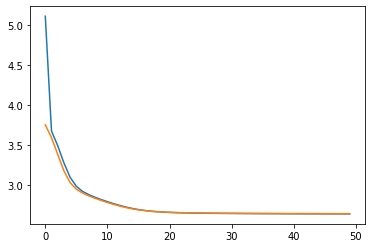

In [ ]:
import pandas as pd
import numpy as np
import torch as th
from torch import nn,optim
from torch.autograd import Variable as V
from torch.nn import functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/Intrusion-Detection-CVAE/dataset/CVAE_Train+.csv")
test = pd.read_csv("/content/Intrusion-Detection-CVAE/dataset/CVAE_Test+.csv")
trainx, trainy = np.array(train[train.columns[train.columns != "class"]]), np.array(pd.get_dummies(train["class"]))
testx, testy= np.array(test[train.columns[train.columns != "class"]]), np.array(pd.get_dummies(test["class"]))
# trainx= train.drop(['class', 'Attack'],axis=1)
# trainy = train[['class']]
# testx = test.drop(['class', 'Attack'],axis=1)
# testy = test[['class']]
batch_size = 500
max_epoch = 50
train_N = len(train)
test_N = len(test)
gpu = False
device = "cuda" if gpu else "cpu"


model = CVAE()
if gpu:
    model = model.cuda()
opt = optim.Adadelta(model.parameters(),lr = 1e-3)

def Loss_function(x_hat,x, mu,logsimga):
    reconstraction_loss = F.binary_cross_entropy(x_hat,x,size_average = False)
    KL_div = -0.5 * th.sum(1+logsimga-mu.pow(2) - logsimga.exp())

    return reconstraction_loss+KL_div


def create_batch(x,y):
    a = list(range(len(x)))
    np.random.shuffle(a)
    x = x[a]
    y = y[a]
    batch_x = [x[batch_size * i : (i+1)*batch_size,:].tolist() for i in range(len(x)//batch_size)]
    batch_y = [y[batch_size * i : (i+1)*batch_size].tolist() for i in range(len(x)//batch_size)]
    return batch_x, batch_y


def train():
    model.train()
    tr_loss = 0
    batch_x,batch_y = create_batch(trainx,trainy)
    for x,y in zip(batch_x,batch_y):
        opt.zero_grad()
        if gpu:
            x,y = V(th.Tensor(x).cuda()),V(th.Tensor(y).cuda())
        else:
            x,y = V(th.Tensor(x)),V(th.Tensor(y))
        x_hat,mu,logsigma = model(x,y)
        loss = Loss_function(x_hat,x,mu,logsigma)

        loss.backward()
        tr_loss += loss.item()
        opt.step()
    return tr_loss/train_N


def test():
    model.eval()
    te_loss = 0
    batch_x,batch_y = create_batch(testx,testy)
    with th.no_grad():
        for x,y in zip(batch_x,batch_y):
            if gpu:
                x,y = V(th.Tensor(x).cuda()),V(th.Tensor(y).cuda())
            else:
                x,y = V(th.Tensor(x)),V(th.Tensor(y))
            x_hat,mu,sigma = model(x,y)
            loss = Loss_function(x_hat,x,mu,sigma)
            te_loss += loss.item()

    return te_loss/test_N

tr_loss ,te_loss = [],[]
for epoch in range(max_epoch):
    trl = train()
    tel = test()
    tr_loss.append(trl)
    te_loss.append(tel)
    if epoch % 2 == 0:
        print(epoch,trl,tel)

th.save(model.state_dict(), f"/content/Intrusion-Detection-CVAE/save_model/vae_adadelta_{max_epoch}.pth")
plt.plot(tr_loss)
plt.plot(te_loss)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pylab
import torch as th
import torch.nn.functional as F
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
def Loss_function(x_hat,x, mu,logsimga):
    reconstraction_loss = F.binary_cross_entropy(x_hat,x,size_average = False)
    KL_div = -0.5 * th.sum(1+logsimga-mu.pow(2) - logsimga.exp())

    return reconstraction_loss+KL_div

with th.no_grad():
  model = CVAE()
  param = th.load('/content/Intrusion-Detection-CVAE/save_model/vae_adadelta_50.pth',map_location=lambda x,y:x)
  model.load_state_dict(param)

  test = pd.read_csv("/content/Intrusion-Detection-CVAE/dataset/CVAE_Test+.csv")
  testx, testy= np.array(test[test.columns[test.columns != "class"]]), np.array(pd.get_dummies(test["class"]))
  z_dim = 25
  n,m = testx.shape[1],testy.shape[1]
  test_label = th.eye(m)
  attack_name = ["Probe","Normal","DoS","R2L","U2R"]
  pred = []
  for x in testx:
      each_loss = []
      x = th.Tensor(x.reshape(1,n))
      for label in test_label:
          label = th.Tensor(label.reshape(1,m))
          x_hat,mu,sigma = model(x,label)
          loss = Loss_function(x_hat,x,mu,sigma)
          each_loss.append(loss)
      pred.append(np.identity(m)[np.argmin(each_loss)])

  print(classification_report(testy,np.array(pred),target_names=attack_name, digits=4))

  # visualize latent space 
  if z_dim == 2:
      z = model.encoder(V(th.Tensor(trainx)))
      mu,var = z
      mu,var = mu.detach().numpy(),var.detach().numpy()
      plt.figure(figsize=(10,10))
      plt.scatter(mu[:,0], mu[:,1],marker =".", c = label, cmap=pylab.cm.jet,alpha=0.4)
      plt.colorbar()
      plt.show()

              precision    recall  f1-score   support

       Probe     0.8353    0.4361    0.5731     32068
      Normal     0.9998    0.8532    0.9207    118714
         DoS     0.7137    1.0000    0.8330     47471
         R2L     0.9802    0.9958    0.9879     11903
         U2R     0.0144    0.4527    0.0279       444

   micro avg     0.8300    0.8300    0.8300    210600
   macro avg     0.7087    0.7476    0.6685    210600
weighted avg     0.9071    0.8300    0.8499    210600
 samples avg     0.8300    0.8300    0.8300    210600



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
	
print('Accuracy: %.3f' % accuracy_score(testy,pred))
print('Precision: %.3f' % precision_score(testy,pred,average="micro"))
print('Recall: %.3f' % recall_score(testy,pred,average="micro"))
print('F1 Score: %.3f' % f1_score(testy,pred,average="micro"))

Accuracy: 0.830
Precision: 0.830
Recall: 0.830
F1 Score: 0.830


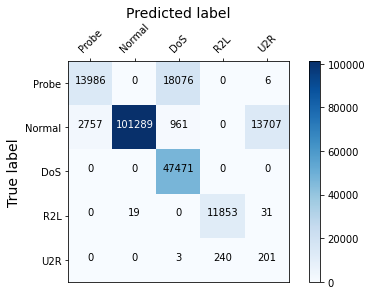

In [ ]:
import itertools
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy.argmax(axis=1), np.argmax(pred, axis=1))
class_names = ["Probe","Normal","DoS","R2L","U2R"]
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()
    
fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")
    
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.show()